In [57]:
import numpy as np

In [58]:
import polars as pl

schema_overrides = {
    'tip_amount': pl.Float64,
    'tolls_amount': pl.Float64
}

month_jan_2016 = pl.read_csv('DataSets/yellow_tripdata_2016-01.csv', schema_overrides = schema_overrides)
total_records = month_jan_2016.shape[0]

In [59]:
month_jan_2016.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RatecodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

# **NYC Taxi Trip Record Data - Column Descriptions**

---

**1. VendorID**  
**Description:** A code indicating the provider associated with the trip record.  

**2. tpep_pickup_datetime**  
**Description:** The date and time when the meter was engaged.  

**3. tpep_dropoff_datetime**  
**Description:** The date and time when the meter was disengaged.  

**4. passenger_count**  
**Description:** The number of passengers in the vehicle (driver-entered value).  

**5. trip_distance**  
**Description:** The elapsed trip distance in miles reported by the taximeter.  

**6. RatecodeID**  
**Description:** The final rate code in effect at the end of the trip.  

**7. store_and_fwd_flag**  
**Description:** Indicates whether the trip record was stored before sending to the vendor.  

**8. PULocationID**  
**Description:** TLC Taxi Zone in which the trip began.  

**9. DOLocationID**  
**Description:** TLC Taxi Zone in which the trip ended.  

**10. payment_type**  
**Description:** A numeric code signifying how the passenger paid for the trip.  

**11. fare_amount**  
**Description:** The time-and-distance fare calculated by the meter.  

**12. extra**  
**Description:** Miscellaneous extras and surcharges (e.g., rush hour and overnight charges).  

**13. mta_tax**  
**Description:** USD 0.50 MTA tax automatically triggered based on the metered rate.  

**14. tip_amount**  
**Description:** Tip amount (automatically populated for credit card payments, cash tips not included).  

**15. tolls_amount**  
**Description:** Total amount of all tolls paid during the trip.  

**16. improvement_surcharge**  
**Description:** USD 0.30 improvement surcharge assessed on hailed trips at flag drop.  

**17. total_amount**  
**Description:** The total amount charged to passengers, including fare, extras, taxes, and tolls.  

**18. congestion_surcharge**  
**Description:** Total amount collected in trip for NYS congestion surcharge.  

**19. airport_fee**  
**Description:** USD 1.25 fee for trips to/from NYC airports.  


---

### **Source:**  
[NYC Taxi & Limousine Commission (TLC)](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [60]:
for column in month_jan_2016.columns:
    print(f'Unique values in {column}')
    print(month_jan_2016[column].unique())
    print('\n'+'-' * 60+'\n')

Unique values in VendorID
shape: (2,)
Series: 'VendorID' [i64]
[
	1
	2
]

------------------------------------------------------------

Unique values in tpep_pickup_datetime
shape: (2_368_616,)
Series: 'tpep_pickup_datetime' [str]
[
	"2016-01-14 12:14:58"
	"2016-01-02 13:34:40"
	"2016-01-25 07:14:41"
	"2016-01-15 16:34:15"
	"2016-01-09 09:48:09"
	…
	"2016-01-18 06:55:11"
	"2016-01-03 01:25:37"
	"2016-01-30 17:16:06"
	"2016-01-12 04:51:36"
	"2016-01-18 00:27:57"
]

------------------------------------------------------------

Unique values in tpep_dropoff_datetime
shape: (2_372_528,)
Series: 'tpep_dropoff_datetime' [str]
[
	"2016-01-08 22:40:25"
	"2016-01-18 12:52:25"
	"2016-01-05 21:22:18"
	"2016-01-31 09:29:00"
	"2016-01-19 21:10:15"
	…
	"2016-01-21 17:19:29"
	"2016-01-03 15:48:49"
	"2016-01-09 23:26:34"
	"2016-01-11 15:01:46"
	"2016-01-30 04:45:04"
]

------------------------------------------------------------

Unique values in passenger_count
shape: (10,)
Series: 'passenger_count' 

# ML Problem Formulation 
**Time Series Forecasting and Regression**  
To find the number of pickups in the given location (longitude and latitude) and time.  
In the query region and surrounding points.  
  
**Problem**  
Given a Region in Time Interval Predict Number of PickUps  
If pickup at Time T = x what is the pickup at time T+1 = ?

**Steps**  
NYC Region -> Breakup
   

# Performace Metrics
**Mean Absolute Percentage Error (MAPE)**  
1/n Σ ( | { ( Pt - Pt^ ) / Pt } 100 | ) 
 
**Mean Squared Error (MSE)**  
1/n Σ (( Pt - Pt^ )^2)

# Data Cleaning  
Using univariate analysis we are removing Outliers / Illegitimate values

In [61]:
month_jan_2016.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
2,"""2016-01-01 00:00:00""","""2016-01-01 00:00:00""",2,1.1,-73.990372,40.734695,1,"""N""",-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
2,"""2016-01-01 00:00:00""","""2016-01-01 00:00:00""",5,4.9,-73.980782,40.729912,1,"""N""",-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,"""2016-01-01 00:00:00""","""2016-01-01 00:00:00""",1,10.54,-73.98455,40.679565,1,"""N""",-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
2,"""2016-01-01 00:00:00""","""2016-01-01 00:00:00""",1,4.75,-73.993469,40.71899,1,"""N""",-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
2,"""2016-01-01 00:00:00""","""2016-01-01 00:00:00""",3,1.76,-73.960625,40.78133,1,"""N""",-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


# Pickup Latitude and Longitude  
The approximate bounding box (latitude and longitude) of New York City (NYC) is:  
	•	Southwest Corner (Min Latitude, Min Longitude): (40.4774, -74.2591)  
	•	Northeast Corner (Max Latitude, Max Longitude): (40.9176, -73.7004)

In [62]:
import polars as pl
import folium

# Define NYC bounding box
min_lat, max_lat = 40.4774, 40.9176
min_lon, max_lon = -74.2591, -73.7004

# Assuming your DataFrame is named "month_jan_2016"
df = month_jan_2016.select(["pickup_latitude", "pickup_longitude"]).drop_nulls()

# Convert to Pandas since Folium doesn't support Polars directly
sampled_df = df.sample(n=500, seed=42).to_pandas()

# Identify outliers
sampled_df["is_outlier"] = ~((sampled_df["pickup_latitude"].between(min_lat, max_lat)) & 
                             (sampled_df["pickup_longitude"].between(min_lon, max_lon)))

# Create NYC map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add points to the map
for _, row in sampled_df.iterrows():
    color = "red" if row["is_outlier"] else "blue"
    folium.CircleMarker(
        location=[row["pickup_latitude"], row["pickup_longitude"]],
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5
    ).add_to(nyc_map)

# Save and display the map
nyc_map.save("maps/nyc_taxi_map.html")

# Trip Duration  
Maximum allowed trip duration in 24 Hrs is 12 Hrs

In [63]:
import polars as pl
import datetime

# Convert timestamps into Unix Time
def convert_to_unix(s: str) -> float:
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timestamp()

# Function to calculate trip times and speeds
def return_with_trip_times(month_jan_2016):
    month_jan_2016 = month_jan_2016.with_columns([
        pl.col("tpep_pickup_datetime").map_elements(convert_to_unix, return_dtype=pl.Float64).alias("pickup_unix"),
        pl.col("tpep_dropoff_datetime").map_elements(convert_to_unix, return_dtype=pl.Float64).alias("dropoff_unix")
    ])

    # Compute trip duration in minutes
    month_jan_2016 = month_jan_2016.with_columns(
        ((pl.col("dropoff_unix") - pl.col("pickup_unix")) / 60).alias("trip_times")
    )

    # Avoid division by zero: Replace zero trip_times with NaN before calculating Speed
    month_jan_2016 = month_jan_2016.with_columns(
        pl.when(pl.col("trip_times") == 0)
          .then(None)
          .otherwise(pl.col("trip_times"))
          .alias("trip_times")
    )

    # Compute speed (handling division by zero)
    month_jan_2016 = month_jan_2016.with_columns(
        ((60 * pl.col("trip_distance").cast(pl.Float64)) / pl.col("trip_times")).alias("speed")
    )

    return month_jan_2016

# Apply function
month_jan_2016_modified = return_with_trip_times(month_jan_2016)

In [64]:
# Check few records
month_jan_2016_modified.filter(
    (pl.col("trip_times") > 0) & 
    (~pl.col("speed").is_null()) &
    (~(pl.col("speed") == float("inf")))
).head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,"""2016-01-01 00:00:00""","""2016-01-01 00:18:30""",2,5.52,-73.980118,40.74305,1,"""N""",-73.91349,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,1.4516e9,1.4516e9,18.5,17.902703
2,"""2016-01-01 00:00:00""","""2016-01-01 00:26:45""",2,7.45,-73.994057,40.71999,1,"""N""",-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,1.4516e9,1.4516e9,26.75,16.71028
1,"""2016-01-01 00:00:01""","""2016-01-01 00:11:55""",1,1.2,-73.979424,40.744614,1,"""N""",-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,1.4516e9,1.4516e9,11.9,6.05042
1,"""2016-01-01 00:00:02""","""2016-01-01 00:11:14""",1,6.0,-73.947151,40.791046,1,"""N""",-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,1.4516e9,1.4516e9,11.2,32.142857
2,"""2016-01-01 00:00:02""","""2016-01-01 00:11:08""",1,3.21,-73.998344,40.723896,1,"""N""",-73.99585,40.6884,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,1.4516e9,1.4516e9,11.1,17.351351


# Checking for outliers

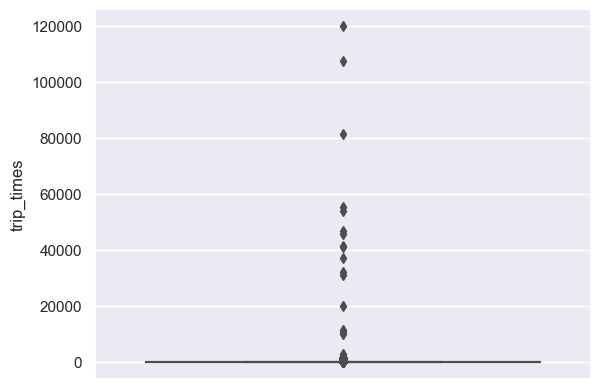

In [65]:
# Calculate the percentiles to remove outliers, and check with BoxPlots
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for plotting
sns.boxplot(data = month_jan_2016_modified.to_pandas(), y = "trip_times")
plt.show()

In [66]:
deciles = [i / 10 for i in range(1, 11)]

decile_values = month_jan_2016_modified.select([
    pl.col("trip_times").quantile(q).alias(f"{int(q * 100)}th") for q in deciles
])

# Convert to dictionary and print nicely
for col in decile_values.columns:
    value = decile_values[0, col]
    print(f"{col} percentile is {value:.2f}")

10th percentile is 3.95
20th percentile is 5.58
30th percentile is 7.12
40th percentile is 8.70
50th percentile is 10.47
60th percentile is 12.57
70th percentile is 15.22
80th percentile is 18.95
90th percentile is 25.52
100th percentile is 119912.70


In [67]:
deciles = [round(i / 10, 1) for i in range(991, 1001)]
print(deciles)

decile_values = month_jan_2016_modified.select([
    pl.col("trip_times").quantile(q / 100).alias(f"{q}th") for q in deciles
])

# Convert to dictionary and print nicely
for col in decile_values.columns:
    value = decile_values[0, col]
    print(f"{col} percentile is {value:.2f}")

[99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100.0]
99.1th percentile is 55.55
99.2th percentile is 57.40
99.3th percentile is 59.65
99.4th percentile is 62.23
99.5th percentile is 65.47
99.6th percentile is 69.92
99.7th percentile is 76.60
99.8th percentile is 92.37
99.9th percentile is 1424.07
100.0th percentile is 119912.70


In [68]:
print(month_jan_2016_modified.shape)
print(total_records)

(10906858, 23)
10906858


In [69]:
print(month_jan_2016_modified.schema)

Schema([('VendorID', Int64), ('tpep_pickup_datetime', String), ('tpep_dropoff_datetime', String), ('passenger_count', Int64), ('trip_distance', Float64), ('pickup_longitude', Float64), ('pickup_latitude', Float64), ('RatecodeID', Int64), ('store_and_fwd_flag', String), ('dropoff_longitude', Float64), ('dropoff_latitude', Float64), ('payment_type', Int64), ('fare_amount', Float64), ('extra', Float64), ('mta_tax', Float64), ('tip_amount', Float64), ('tolls_amount', Float64), ('improvement_surcharge', Float64), ('total_amount', Float64), ('pickup_unix', Float64), ('dropoff_unix', Float64), ('trip_times', Float64), ('speed', Float64)])


# Data Cleaning Remove Outliers

# Data Cleaning - Trip_times

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


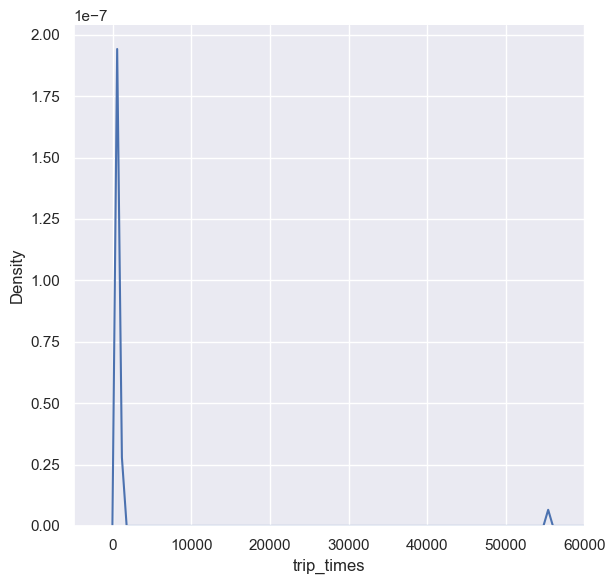

In [70]:
# Ploting PDF
sns.FacetGrid(month_jan_2016_modified.to_pandas(), height = 6)\
    .map(sns.kdeplot, 'trip_times')\
    .add_legend();
plt.xlim(-5000, 60000);
plt.show();

In [71]:
from math import sqrt
month_jan_2016_modified = month_jan_2016_modified.with_columns(pl.col('trip_times').map_elements(lambda x: sqrt(x) if x > 0 else None).alias("log_trip_times"))

/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_21226/3549263258.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  month_jan_2016_modified = month_jan_2016_modified.with_columns(pl.col('trip_times').map_elements(lambda x: sqrt(x) if x > 0 else None).alias("log_trip_times"))


In [72]:
month_jan_2016_modified['log_trip_times'].tail(100)

log_trip_times
f64
4.78191
2.284002
1.0
3.396076
2.895399
…
2.786874
0.428174
327.769838


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


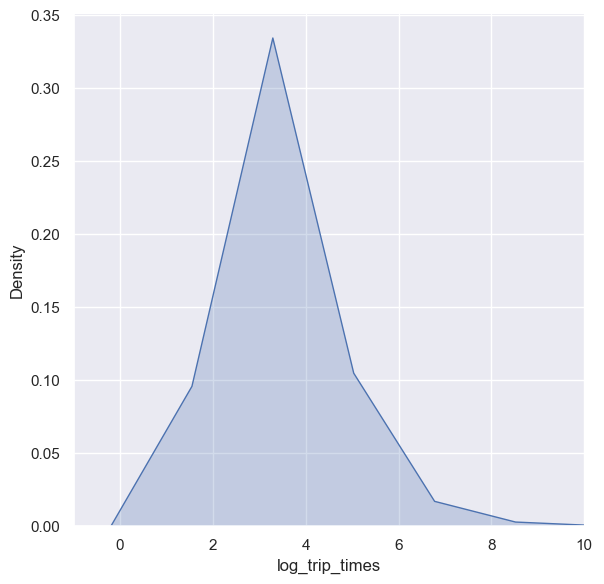

In [73]:
sns.set(style="darkgrid") 
sns.FacetGrid(month_jan_2016_modified.to_pandas(), height = 6)\
    .map(sns.kdeplot, 'log_trip_times', bw_adjust = 1.5, fill = True)\
    .add_legend();
plt.xlim(-1, 10)
plt.show();

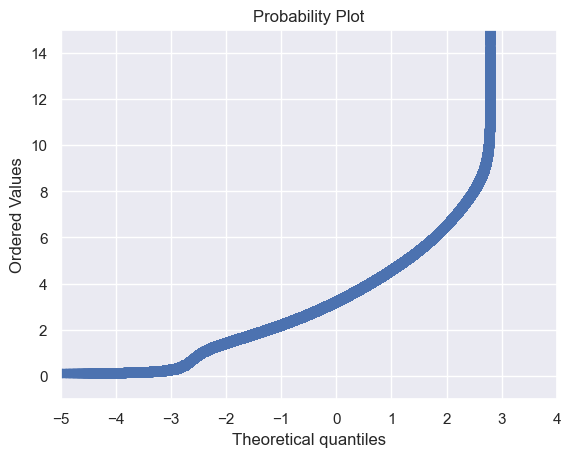

In [74]:
import scipy.stats as scs

scs.probplot(month_jan_2016_modified['log_trip_times'].to_numpy(), plot = plt)
plt.ylim(-1, 15)
plt.xlim(-5, 4)
plt.show()

# Data Cleaning: SPEED

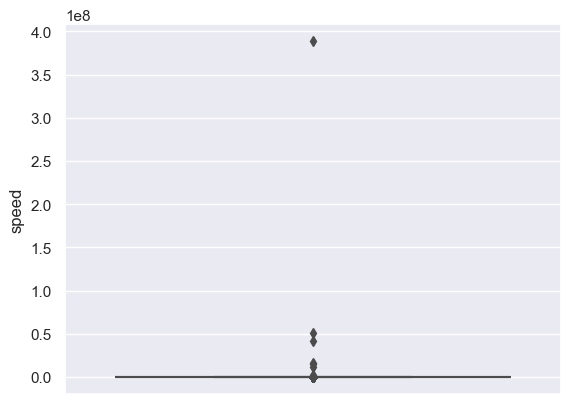

In [75]:
sns.boxplot(month_jan_2016_modified.to_pandas(), y = 'speed');
plt.show()

In [76]:
speed = month_jan_2016_modified["speed"].cast(pl.Float64).drop_nulls().to_numpy()
deciles = list(range(10, 101, 10))
percentile_values = np.percentile(speed, deciles)

for i, val in zip(deciles, percentile_values):
    print(f'{i}th Percentile: {val}')

10th Percentile: 5.929078014184397
20th Percentile: 7.341176470588236
30th Percentile: 8.46095526914329
40th Percentile: 9.517241379310345
50th Percentile: 10.616621983914209
60th Percentile: 11.865168539325841
70th Percentile: 13.423728813559322
80th Percentile: 15.68
90th Percentile: 20.083086053412465
100th Percentile: 388589676.9230769


In [77]:
percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(speed, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')


90th Percentile: 20.083086053412465
91th Percentile: 20.83224967490247
92th Percentile: 21.686746987951807
93th Percentile: 22.666666666666668
94th Percentile: 23.80876494023904
95th Percentile: 25.150684931506852
96th Percentile: 26.771463119709793
97th Percentile: 28.82175226586103
98th Percentile: 31.549341833653983
99th Percentile: 35.793103448275865
100th Percentile: 388589676.9230769


In [78]:
percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(speed, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')

99.1th Percentile: 36.38053651193501
99.2th Percentile: 37.04389902107724
99.3th Percentile: 37.78273172109731
99.4th Percentile: 38.611311770620325
99.5th Percentile: 39.6
99.6th Percentile: 40.8
99.7th Percentile: 42.34745472763915
99.8th Percentile: 44.64379947229552
99.9th Percentile: 52.0411214993884
100.0th Percentile: 388589676.9230769


We will exclude everything above 53.00

In [79]:
month_jan_2016_modified = month_jan_2016_modified.filter(
    (pl.col('trip_distance').is_not_null()) &
    (pl.col('speed') >= 0) & 
    (pl.col("speed") <= 53))
speed_record_loss = total_records - month_jan_2016_modified.shape[0]
speed_record_loss

22067

In [80]:
# Average Speed in NYC 
print(month_jan_2016_modified['speed'].mean());

12.049249916604218


**Average Speed is 12 MPH, car travels 2 Miles per 10 Min on an Avg**

# Data Cleaning: DISTANCE

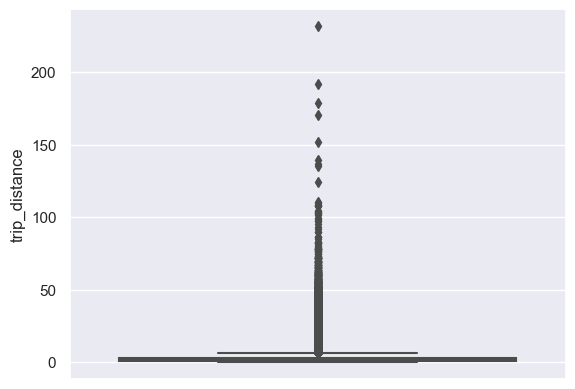

In [81]:
sns.boxplot(month_jan_2016_modified.to_pandas(), y = 'trip_distance');
plt.show()

In [82]:
trip_distances = month_jan_2016_modified["speed"].to_pandas()
deciles = [i * 10 for i in range(1, 11)]
percentile_values = np.percentile(trip_distances, deciles)

for j, i in enumerate(range(10, 101, 10)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(trip_distances, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(trip_distances, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')



10th Percentile: 5.926829268292684
20th Percentile: 7.338129496402877
30th Percentile: 8.457831325301205
40th Percentile: 9.513212795549375
50th Percentile: 10.610526315789475
60th Percentile: 11.8562874251497
70th Percentile: 13.411764705882353
80th Percentile: 15.65217391304348
90th Percentile: 20.016116035455276
100th Percentile: 52.99594889373637

90th Percentile: 20.016116035455276
91th Percentile: 20.764044943820224
92th Percentile: 21.6
93th Percentile: 22.572687224669604
94th Percentile: 23.69784172661871
95th Percentile: 25.01443298969072
96th Percentile: 26.6046511627907
97th Percentile: 28.60661862050054
98th Percentile: 31.2477464224379
99th Percentile: 35.26280543430835
100th Percentile: 52.99594889373637

99.1th Percentile: 35.81260844418739
99.2th Percentile: 36.4
99.3th Percentile: 37.06483275591365
99.4th Percentile: 37.80705491265404
99.5th Percentile: 38.635118968769
99.6th Percentile: 39.62966908569951
99.7th Percentile: 40.833333333333336
99.8th Percentile: 42.3868

In [83]:
percentiles = np.round(np.append(np.arange(99.90, 100.0, 0.01), 100.0), 2)

percentile_values = np.percentile(trip_distances, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p:.2f}th Percentile: {percentile_values[j]}')

99.90th Percentile: 44.7224874930065
99.91th Percentile: 45.02373373393777
99.92th Percentile: 45.39254559873117
99.93th Percentile: 45.78367730453721
99.94th Percentile: 46.21323054602761
99.95th Percentile: 46.70845571926686
99.96th Percentile: 47.29300488650256
99.97th Percentile: 48.0
99.98th Percentile: 48.97255584069229
99.99th Percentile: 50.346468623722686
100.00th Percentile: 52.99594889373637


In [84]:
month_jan_2016_modified = month_jan_2016_modified.filter(
    (pl.col('trip_distance').is_not_null()) &
    (pl.col('trip_distance') >= 0) &
    (pl.col('trip_distance') <= 44)
)
trip_distances_record_loss = total_records - month_jan_2016_modified.shape[0]
trip_distances_record_loss

22661

In [85]:
month_jan_2016_modified.head(5)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed,log_trip_times
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,"""2016-01-01 00:00:00""","""2016-01-01 00:18:30""",2,5.52,-73.980118,40.74305,1,"""N""",-73.91349,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,1.4516e9,1.4516e9,18.5,17.902703,4.301163
2,"""2016-01-01 00:00:00""","""2016-01-01 00:26:45""",2,7.45,-73.994057,40.71999,1,"""N""",-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,1.4516e9,1.4516e9,26.75,16.71028,5.17204
1,"""2016-01-01 00:00:01""","""2016-01-01 00:11:55""",1,1.2,-73.979424,40.744614,1,"""N""",-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,1.4516e9,1.4516e9,11.9,6.05042,3.449638
1,"""2016-01-01 00:00:02""","""2016-01-01 00:11:14""",1,6.0,-73.947151,40.791046,1,"""N""",-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,1.4516e9,1.4516e9,11.2,32.142857,3.34664
2,"""2016-01-01 00:00:02""","""2016-01-01 00:11:08""",1,3.21,-73.998344,40.723896,1,"""N""",-73.99585,40.6884,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,1.4516e9,1.4516e9,11.1,17.351351,3.331666


In [86]:
month_jan_2016_modified.shape


(10884197, 24)

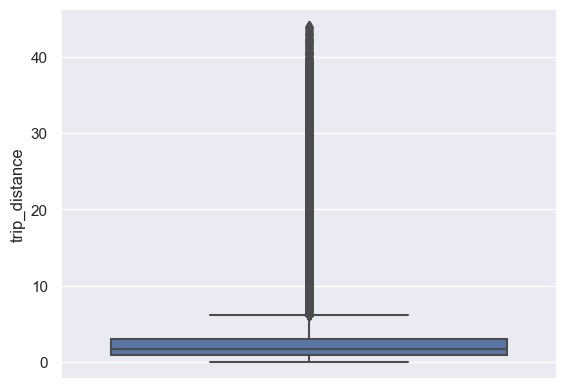

In [87]:
sns.boxplot(data = month_jan_2016_modified.to_pandas(), y = 'trip_distance')
plt.show()

In [88]:
trip_distances = month_jan_2016_modified['trip_distance'].to_pandas()


In [89]:
trip_distances.values.mean()

2.8945607131146245

In [90]:
trip_distances.median()

1.68

# Data Cleaning: Fare

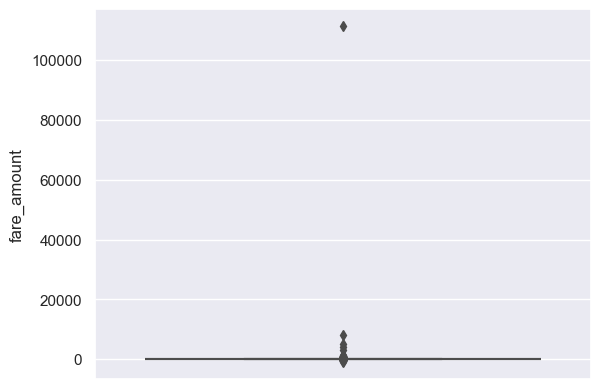

In [91]:
sns.boxplot(month_jan_2016_modified.to_pandas(), y = 'fare_amount')
plt.show()

In [92]:
fares = month_jan_2016_modified['fare_amount'].to_pandas()

deciles = [i * 10 for i in range(1, 11)]
percentile_values = np.percentile(fares, deciles)

for j, i in enumerate(range(10, 101, 10)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(fares, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(fares, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')



10th Percentile: 5.0
20th Percentile: 6.0
30th Percentile: 7.0
40th Percentile: 8.0
50th Percentile: 9.0
60th Percentile: 10.5
70th Percentile: 12.5
80th Percentile: 16.0
90th Percentile: 23.5
100th Percentile: 111270.85

90th Percentile: 23.5
91th Percentile: 25.0
92th Percentile: 27.0
93th Percentile: 28.5
94th Percentile: 31.0
95th Percentile: 33.5
96th Percentile: 37.5
97th Percentile: 45.0
98th Percentile: 52.0
99th Percentile: 52.0
100th Percentile: 111270.85

99.1th Percentile: 52.0
99.2th Percentile: 52.0
99.3th Percentile: 52.0
99.4th Percentile: 52.0
99.5th Percentile: 54.5
99.6th Percentile: 58.0
99.7th Percentile: 62.5
99.8th Percentile: 68.0
99.9th Percentile: 80.0
100.0th Percentile: 111270.85


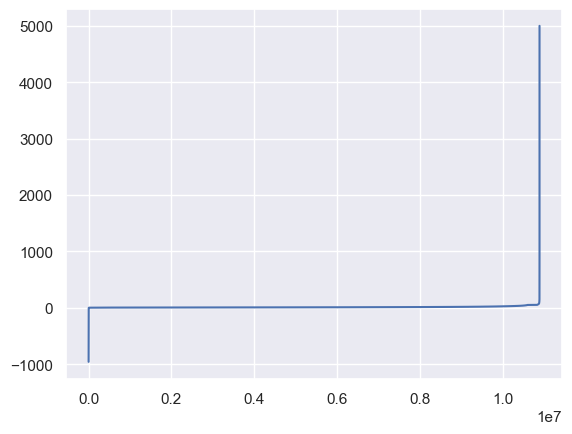

In [93]:
plt.plot(np.sort(fares.values)[:-2])
plt.show()

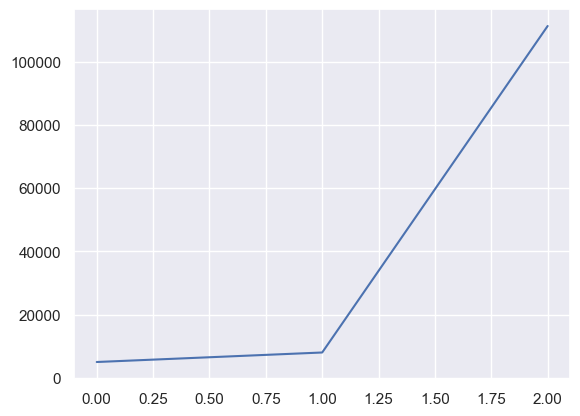

In [94]:
plt.plot(np.sort(fares.values)[-3:])
plt.show()

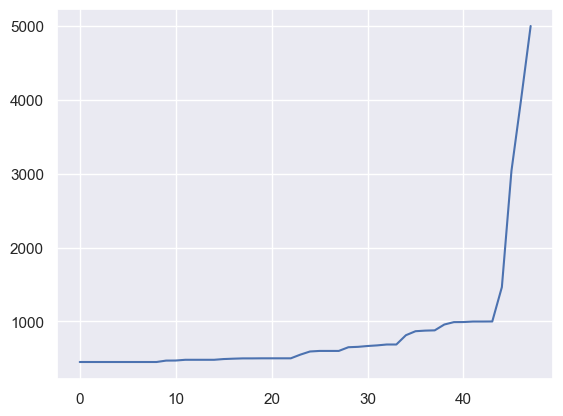

In [95]:
plt.plot(np.sort(fares.values)[-50:-2])
plt.show()

In [96]:
month_jan_2016_modified = month_jan_2016_modified.filter((pl.col('fare_amount') > 0) & (pl.col('fare_amount') <= 1000))
fare_amount_record_loss = total_records - month_jan_2016_modified.shape[0]
fare_amount_record_loss

29130

# Data Cleaning: NYC 

In [97]:
min_lat, max_lat = 40.4774, 40.9176
min_lon, max_lon = -74.2591, -73.7004

month_jan_2016_modified = month_jan_2016_modified.filter((pl.col('pickup_longitude') > min_lon) & (pl.col('pickup_longitude') < max_lon))
month_jan_2016_modified = month_jan_2016_modified.filter((pl.col('pickup_latitude') > min_lat) & (pl.col('pickup_latitude') < max_lat))
month_jan_2016_modified = month_jan_2016_modified.filter((pl.col('dropoff_longitude') > min_lon) & (pl.col('dropoff_longitude') < max_lon))
month_jan_2016_modified = month_jan_2016_modified.filter((pl.col('dropoff_latitude') > min_lat) & (pl.col('dropoff_latitude') < max_lat))

lattitude_longitude_record_loss = total_records - month_jan_2016_modified.shape[0]

In [98]:
print('Records Loss On Outliers Removal')
print('Distance:', trip_distances_record_loss)
print('Speed:', speed_record_loss)
print('Fare Amount:', fare_amount_record_loss)
print('NYC Region Lat vs Long: ', lattitude_longitude_record_loss)

total_records_loss = sum([trip_distances_record_loss, speed_record_loss, fare_amount_record_loss, lattitude_longitude_record_loss])
print('\nTotal Loss:', total_records_loss, 'out of', total_records)

percentage_lost = (total_records_loss * 100) / total_records
percentage_retained = 100 - percentage_lost

print('Percentage Retained:', round(percentage_retained, 3), 'Percentage Lost: ', round(100 - percentage_retained, 3))

Records Loss On Outliers Removal
Distance: 22661
Speed: 22067
Fare Amount: 29130
NYC Region Lat vs Long:  210900

Total Loss: 284758 out of 10906858
Percentage Retained: 97.389 Percentage Lost:  2.611


# Data Preparation and Clustering / Segmentation

In [99]:
from sklearn.cluster import MiniBatchKMeans
import gpxpy.geo # for haversine distance

# Getting coordinates from Polars DataFrame
coords = month_jan_2016_modified.select([
    'pickup_latitude', 'pickup_longitude'
]).to_numpy()

# Will store nice cluster counts for each cluster size
neighbours = []

# Function to compute how many clusters are close to each other (i.e., within 2 miles)
def find_min_distance(cluster_centers, cluster_len):
    less2 = []       # Stores count of close clusters for each center less than 2 Mile
    more2 = []       # Stores count of far clusters for each center greater than 2 Mile
    min_dist = 10000  # Initialize with a large distance (used for tracking minimum)

    for i in range(cluster_len): # For each cluster center
        nice_points = 0  # Clusters with at least one nearby cluster (within 2 miles)
        wrong_points = 0 # Clusters with no nearby clusters
        for j in range(cluster_len): # Compare with every other cluster
            if j == i:
                continue # skip comparing with itself
            
            distance = gpxpy.geo.haversine_distance(
                cluster_centers[i][0], cluster_centers[i][1],
                cluster_centers[j][0], cluster_centers[j][1]
            )
            
            # Convert meters to miles and track minimum inter-cluster distance
            distance_miles = distance / (1.60934 * 1000)
            min_dist = min(min_dist, distance_miles)
            # Count as "nice" if distance is <= 2 Miles
            if distance_miles <= 2:
                nice_points += 1
            else:
                wrong_points += 1
                
        less2.append(nice_points)
        more2.append(wrong_points)
        
    # Store the nice-points data for analysis later
    neighbours.append(less2)
    
    avg_within_2 = np.mean(less2)
    avg_outside_2 = cluster_len - avg_within_2
    
    print('===============================================================================================================')
    print(f"On choosing a cluster size of {cluster_len}")
    print(f"Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): {round(avg_within_2, 2)}\
            {round(100 - (avg_outside_2 * 100 / cluster_len), 2)}%")
    print(f"Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): {round(avg_outside_2, 2)}")
    print(f"Min inter-cluster distance =  {round(min_dist, 3)} Gap {round(min_dist - 0.5 , 2)}")
    
# Function to apply MiniBatchKMeans clustering on pickup coordinates
def find_clusters(increment, dataframe):
    # Initialise and fit MiniBatchKMeans with 'increment' number of clusters
    kmeans = MiniBatchKMeans(
        n_clusters = increment, # Number of clusters to form
        batch_size = 10000,     # Mini-batch size for faster convergence
        random_state = 42,      # For reproducibility
    ).fit(coords)
    
    # Add cluster predictions as a new column to the Polars DataFrame
    dataframe = dataframe.with_columns([
        pl.Series(name = 'pickup_cluster', values = kmeans.predict(coords))
    ])
    
    # Extract the coordinates of cluster centers
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers) # Number of clusters (should be equal to increment)
    
    return cluster_centers, cluster_len

# Loop over different values of K (number of clusters)
for increment in range(10, 100, 10): # for k = 10 -> 100 by 10
    cluster_centers, cluster_len = find_clusters(increment, dataframe = month_jan_2016_modified)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 10
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 1.6            16.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.4
Min inter-cluster distance =  1.154 Gap 0.65
On choosing a cluster size of 20
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 3.8            19.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.2
Min inter-cluster distance =  0.577 Gap 0.08
On choosing a cluster size of 30
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 7.0            23.33%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 23.0
Min inter-cluster distance =  0.435 Gap -0.07
On choosing a cluster size of 40
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.75            21.88%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 31.

In [100]:
# Loop over different values of K (number of clusters)
for increment in range(20, 31): # for k = 20 -> 31 by 2
    cluster_centers, cluster_len = find_clusters(increment, dataframe = month_jan_2016_modified)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 20
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 3.8            19.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.2
Min inter-cluster distance =  0.577 Gap 0.08
On choosing a cluster size of 21
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.1            19.5%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.9
Min inter-cluster distance =  0.637 Gap 0.14
On choosing a cluster size of 22
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 5.09            23.14%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.91
Min inter-cluster distance =  0.549 Gap 0.05
On choosing a cluster size of 23
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.96            21.55%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 1

In [101]:
# We choose k = 25 it is close to 0.5-Mile Range with 20.48 % points less than 2.0-Miles Range
cluster_centers, cluster_len = find_clusters(25, dataframe = month_jan_2016_modified)
find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 25
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 5.12            20.48%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 19.88
Min inter-cluster distance =  0.513 Gap 0.01


In [102]:
k = 25 # We choose k as 25 from analysis

# Perform MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 1000000, random_state = 42).fit(coords)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a folium map centered around the mean of coordinates
map_center = [coords[:, 0].mean(), coords[:, 1].mean()]
map_clusters = folium.Map(location = map_center, zoom_start = 12)

# Add cluster centers to the map
for i, (lat, lon) in enumerate(cluster_centers):
    folium.Marker(
        location = [lat, lon],
        popup = f'Cluster {i + 1}',
        icon = folium.Icon(color = 'blue', icon = 'info-sign')
    ).add_to(map_clusters)
    
map_clusters.save('maps/cluster_center_map_jan.html')
print('Map Exported')

Map Exported


/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_21226/4224694409.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', k)


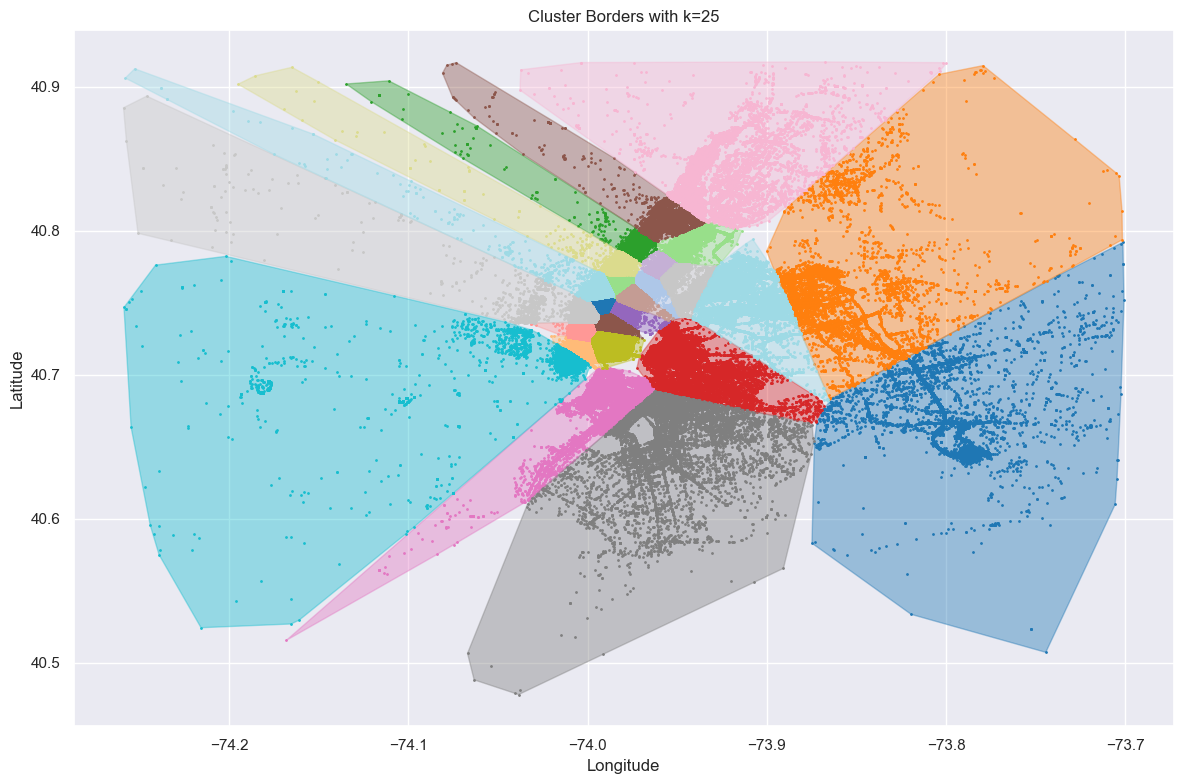

In [103]:
from scipy.spatial import ConvexHull
import matplotlib.cm as cm

labels = kmeans.labels_

# Create color map
colors = cm.get_cmap('tab20', k)

# Plot
plt.figure(figsize = (12, 8))

for i in range(k):
    cluster_points = coords[labels == i]
    
    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha = 0.4, color = colors(i))

    # Scatter the points too
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s = 1, color = colors(i))
    
month_jan_2016_modified = month_jan_2016_modified.with_columns([
    pl.Series('pickup_cluster', labels)
])
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Cluster Borders with k={k}")
plt.grid(True)
plt.tight_layout()
plt.show()

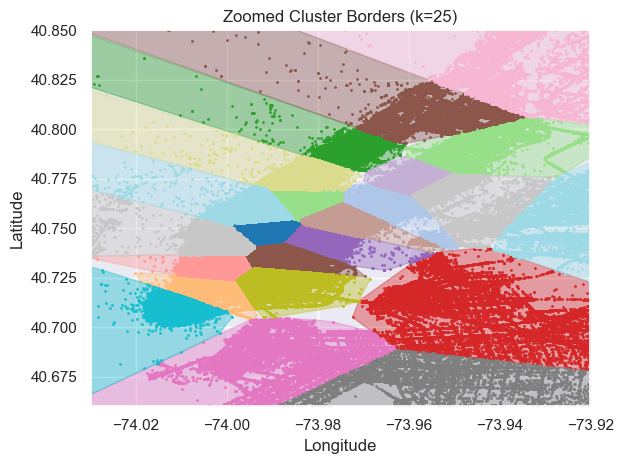

In [104]:
for i in range(k):
    cluster_points = coords[labels == i]

    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha=0.4, color=colors(i))

    # Plot points
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s=1, color=colors(i))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Zoomed Cluster Borders (k={k})")

# 🔍 Zoom into dense Manhattan region (adjust values based on your data)
plt.xlim(-74.03, -73.92)   # Longitude
plt.ylim(40.66, 40.85)     # Latitude

plt.grid(True)
plt.tight_layout()
plt.show()

# Unix Time Binning

In [105]:
[str(item) for item in month_jan_2016_modified['pickup_unix'][10015:10025]]

['1451679433.0',
 '1451679433.0',
 '1451679433.0',
 '1451679434.0',
 '1451679435.0',
 '1451679436.0',
 '1451679436.0',
 '1451679437.0',
 '1451679438.0',
 '1451679438.0']

In [106]:
month_jan_2016_modified.schema

Schema([('VendorID', Int64),
        ('tpep_pickup_datetime', String),
        ('tpep_dropoff_datetime', String),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('pickup_longitude', Float64),
        ('pickup_latitude', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('dropoff_longitude', Float64),
        ('dropoff_latitude', Float64),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('pickup_unix', Float64),
        ('dropoff_unix', Float64),
        ('trip_times', Float64),
        ('speed', Float64),
        ('log_trip_times', Float64),
        ('pickup_cluster', Int32)])

In [107]:
def bin_unix_time(df: pl.DataFrame, column_name: str, bin_size_seconds: int) -> pl.DataFrame:
    return df.with_columns([
        (pl.col(column_name) // bin_size_seconds * bin_size_seconds).alias(f'{column_name}_binned')
    ])

# Apply time binning
month_jan_2016_modified = bin_unix_time(month_jan_2016_modified, 'pickup_unix', 600)

# Convert binned seconds to datetime (in milliseconds)
month_jan_2016_modified = month_jan_2016_modified.with_columns(
    (pl.col("pickup_unix_binned") * 1000)
    .cast(pl.Datetime("ms"))
    .alias("pickup_binned_datetime")
)

# Smoothing Time Series Data

*For each cluster total number of 10 min interval binning*

In [1]:
cluster_bin_freq = (
    month_jan_2016_modified
    .select(['pickup_cluster', 'pickup_unix_binned'])
    .unique()
    .group_by('pickup_cluster')
    .agg([
        pl.count().alias('nums_10min_intervals')
    ])
)

total = 0
for row in cluster_bin_freq.iter_rows():
    cluster_id, num_bins = row
    print(f"For cluster {cluster_id}, there are {num_bins} bins.")
    total += num_bins

print(f"\nTotal number of 10-minute bins across all clusters: {total}")

NameError: name 'month_jan_2016_modified' is not defined

# Export the data with required attributes to CSV

# Winsorization of time column

In [109]:
# Calculate lower and upper thresholds for "trip_times" (e.g., 1st and 99th percentile)
lower_threshold = month_jan_2016_modified.select(
    pl.col("trip_times").quantile(0.01).alias("lower_threshold")
).to_series()[0]

upper_threshold = month_jan_2016_modified.select(
    pl.col("trip_times").quantile(0.99).alias("upper_threshold")
).to_series()[0]

print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)

# Cap the outliers in "trip_times" by winsorizing, and store the result in a new column "trip_times_capped"
month_jan_2016_modified = month_jan_2016_modified.with_columns(
    pl.when(pl.col("trip_times") < lower_threshold)
      .then(lower_threshold)
      .when(pl.col("trip_times") > upper_threshold)
      .then(upper_threshold)
      .otherwise(pl.col("trip_times"))
      .alias("trip_times_capped")
)

# Optional: Display a few rows to verify the changes
print(month_jan_2016_modified.select(["trip_times", "trip_times_capped"]).head())

Lower threshold: 1.5333333333333332
Upper threshold: 53.699999999999996
shape: (5, 2)
┌────────────┬───────────────────┐
│ trip_times ┆ trip_times_capped │
│ ---        ┆ ---               │
│ f64        ┆ f64               │
╞════════════╪═══════════════════╡
│ 18.5       ┆ 18.5              │
│ 26.75      ┆ 26.75             │
│ 11.9       ┆ 11.9              │
│ 11.2       ┆ 11.2              │
│ 11.1       ┆ 11.1              │
└────────────┴───────────────────┘


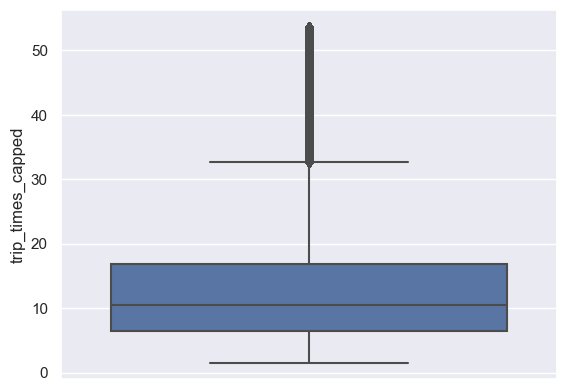

In [110]:
# Calculate the percentiles to remove outliers, and check with BoxPlots
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for plotting
sns.boxplot(data = month_jan_2016_modified.to_pandas(), y = "trip_times_capped")
plt.show()

In [111]:
month_jan_2016_modified.write_csv('Training_And_Testing/jan_2016.csv')

In [112]:
month_jan_2016_modified.shape

(10695958, 28)

In [113]:
print('Completed......')

Completed......
